In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# INTERNET USE

In [2]:
df_internet = pd.read_csv('individuals-using-the-internet.csv')

In [3]:
df_internet = df_internet.drop(columns=[
    'seriesID',
    'seriesCode',
    'seriesName',
    'seriesParent',
    'seriesUnits',
    'entityID',
    'entityIso',
    'dataNote',
    'dataSource',
    'seriesDescription'
])

In [4]:
df_internet = df_internet.rename(columns={
    'entityName': 'Country',
    'dataValue': 'Percentage Use',
    'dataYear': 'Year'
})

In [5]:
df_internet = df_internet.loc[df_internet['Country'] == "Brazil"].reset_index(drop=True)

In [6]:
years = (2003, 2004, 2005, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024)
df_internetuse= df_internet.loc[df_internet['Year'].isin(years)]

# UN egdi

In [7]:
df_egdi = pd.read_csv('concated_egdi_brasil.csv')

In [8]:
df_egdi = df_egdi.drop(columns=['Unnamed: 0'])

In [9]:
df_egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Survey Year                             12 non-null     int64  
 1   Country Name                            12 non-null     object 
 2   E-Government Rank                       12 non-null     int64  
 3   E-Government Index                      12 non-null     float64
 4   E-Participation Index                   12 non-null     float64
 5   Online Service Index                    12 non-null     float64
 6   Human Capital Index                     12 non-null     float64
 7   Telecommunication Infrastructure Index  12 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 900.0+ bytes


In [10]:
df_egdi['E-Government Index'] = df_egdi['E-Government Index'].apply(lambda x: x * 100.0)

In [11]:
df_egdi['E-Participation Index'] = df_egdi['E-Participation Index'].apply(lambda x: x * 100.0)

In [12]:
df_egdi['Online Service Index'] = df_egdi['Online Service Index'].apply(lambda x: x * 100.0)

In [13]:
df_egdi['Human Capital Index'] = df_egdi['Human Capital Index'].apply(lambda x: x * 100.0)

In [14]:
df_egdi['Telecommunication Infrastructure Index'] = df_egdi['Telecommunication Infrastructure Index'].apply(lambda x: x * 100.0)

# PEARSON CORRELATION COEFFICIENT

In [15]:
df = pd.DataFrame()
df['Percentage Use'] = df_internet['Percentage Use']
df['E-Government Index'] = df_egdi['E-Government Index']
df['E-Participation Index'] = df_egdi['E-Participation Index']
df['Human Capital Index'] = df_egdi['Human Capital Index']
df['Online Service Index'] = df_egdi['Online Service Index']
df['Telecommunication Infrastructure Index'] = df_egdi['Telecommunication Infrastructure Index']

In [16]:
pearson_corr_coefficient = df.corr(method='pearson')

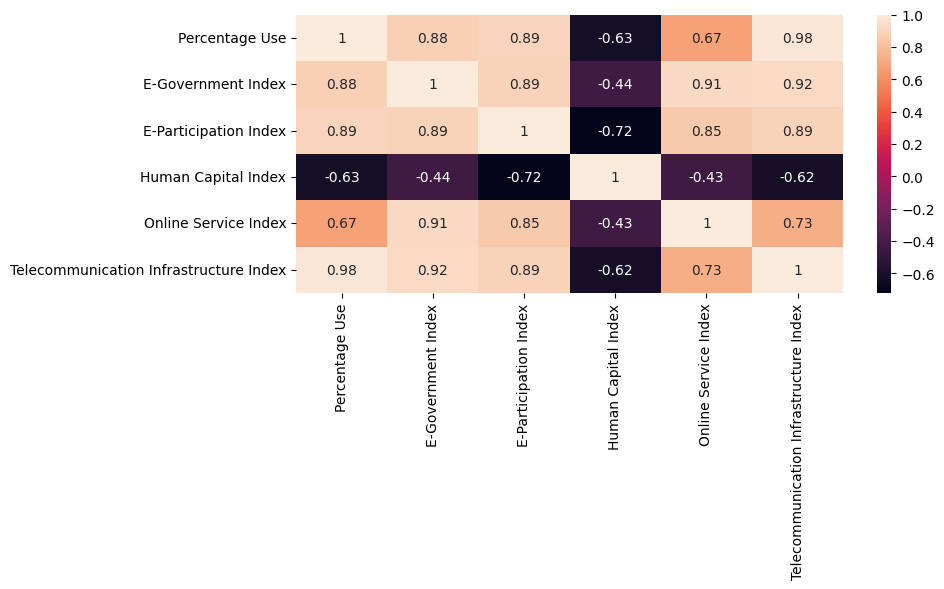

In [17]:
plt.figure(figsize=(10, 6))

sns.heatmap(pearson_corr_coefficient, annot=True)

#plt.suptitle('Coeficiente de Correlação de Pearson: uso de Internet e EGDI no Brasil', fontweight='bold')
plt.tight_layout()
plt.show()